In [456]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [457]:
from sklearn.datasets import load_iris
data=load_iris()

In [458]:
X_bare=data['data'][:,(2,3)]
Y=data['target']

In [459]:
X = np.c_[np.ones((X_bare.shape[0],1)),X_bare]
X.shape

(150, 3)

In [460]:
X_bare[:5,:], X[:5,:]

(array([[1.4, 0.2],
        [1.4, 0.2],
        [1.3, 0.2],
        [1.5, 0.2],
        [1.4, 0.2]]),
 array([[1. , 1.4, 0.2],
        [1. , 1.4, 0.2],
        [1. , 1.3, 0.2],
        [1. , 1.5, 0.2],
        [1. , 1.4, 0.2]]))

In [461]:
def im_softmax(theta,X):
    """
    theta is q * n_f. X is m*n_f, so X.T is n_f * m. 
    As a result theta.(X.T) is a q * m matrix. So p_ci is a q*m matrix where the[c][i] element gives the probablity
    of belonging to class c for the m_th data. 
    """
    exp_theta_X= np.exp(theta.dot(X.T))
    p_ci = exp_theta_X/np.sum(exp_theta_X,axis=0)
    return p_ci

In [462]:
X.T[:,:4]

array([[1. , 1. , 1. , 1. ],
       [1.4, 1.4, 1.3, 1.5],
       [0.2, 0.2, 0.2, 0.2]])

In [463]:
np.random.seed(42)

In [464]:
q = len(np.unique(Y))

test_theta = np.random.randn(q,X.shape[1])

test_theta

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439]])

In [465]:
im_softmax(theta=test_theta,X=X)[:,:2]

array([[0.08744572, 0.08744572],
       [0.17888161, 0.17888161],
       [0.73367267, 0.73367267]])

In [466]:
shuffle_indices = np.random.permutation(X.shape[0])
train_set_size=int(0.7*X.shape[0])

In [467]:
X_train = X[shuffle_indices[:train_set_size]]
Y_train = Y[shuffle_indices[:train_set_size]]

X_test = X[shuffle_indices[train_set_size:]]
Y_test = Y[shuffle_indices[train_set_size:]]

In [468]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((105, 3), (105,), (45, 3), (45,))

In [469]:
from scipy.sparse import coo_matrix 

def Y_encoder(Y):
    m=Y.shape[0]
    col  = np.linspace(0,m-1,num=m,dtype=int)
    row  = Y
    elements= np.ones((1, m))[0]
    return coo_matrix((elements, (row, col)), shape=(q,m)).toarray()

In [470]:
Y_train_enc = Y_encoder(Y_train)
Y_test_enc  = Y_encoder(Y_test)

Y_train[:2], Y_train_enc[:,:2]

(array([2, 1]),
 array([[0., 0.],
        [0., 1.],
        [1., 0.]]))

In [491]:
n_epoch = 5000
alpha = 0.1
eta0 = 0.1
cost_train = []
cost_test = []
theta_series=[]

m_train = X_train.shape[0]
m_test = X_test.shape[0]

n_f = X_train.shape[1]

min_test_cost = np.infty

theta = np.random.randn(q,n_f)

theta_series.append(theta)

counter_stop = 0

for i in range(1,n_epoch+1):
    
    proba_train = im_softmax(theta,X_train)
    
    grad_theta = (1/m_train) * (proba_train -Y_train_enc ).dot(X_train) + alpha*np.c_[np.zeros((q,1)),theta[:,1:]]
    
    theta = theta - eta0*grad_theta
    theta_series.append(theta)
    
    cross_entropy_train = -np.sum(Y_train_enc * np.log(im_softmax(theta,X_train)))/m_train + (alpha/2) * np.sum(np.square(theta[:,1:]))
    cost_train.append(cross_entropy_train)
    
    test_loss = -np.sum(Y_test_enc * np.log(im_softmax(theta,X_test)))/m_test + (alpha/2) * np.sum(np.square(theta[:,1:]))
    cost_test.append(test_loss)
    
    
    if test_loss < min_test_cost:
        min_test_cost = test_loss
        ## just to save the first min!
        if counter_stop == 0 :
            best_theta = theta
    else:
        print('stopped at epoch=%d'%(i))
        print('Cost increased by %.e' %(test_loss-min_test_cost))
        
        counter_stop +=1
        
        #print('best theta is', theta)
        
        #break
    
    if i % 200 ==0:
        print("epcoh=%d cost_train=%.6f cost_test=%.6f " %(i,cross_entropy_train,test_loss))

epcoh=200 cost_train=0.647923 cost_test=0.686095 
epcoh=400 cost_train=0.563085 cost_test=0.593406 
epcoh=600 cost_train=0.532075 cost_test=0.560966 
epcoh=800 cost_train=0.516424 cost_test=0.545229 
epcoh=1000 cost_train=0.507358 cost_test=0.536411 
epcoh=1200 cost_train=0.501720 cost_test=0.531096 
epcoh=1400 cost_train=0.498064 cost_test=0.527757 
epcoh=1600 cost_train=0.495628 cost_test=0.525609 
epcoh=1800 cost_train=0.493973 cost_test=0.524206 
epcoh=2000 cost_train=0.492833 cost_test=0.523283 
epcoh=2200 cost_train=0.492040 cost_test=0.522675 
epcoh=2400 cost_train=0.491484 cost_test=0.522276 
epcoh=2600 cost_train=0.491091 cost_test=0.522016 
epcoh=2800 cost_train=0.490813 cost_test=0.521851 
epcoh=3000 cost_train=0.490614 cost_test=0.521748 
epcoh=3200 cost_train=0.490472 cost_test=0.521688 
epcoh=3400 cost_train=0.490370 cost_test=0.521656 
epcoh=3600 cost_train=0.490297 cost_test=0.521641 
stopped at epoch=3760
Cost increased by 6e-11
stopped at epoch=3761
Cost increased by 

stopped at epoch=4069
Cost increased by 7e-06
stopped at epoch=4070
Cost increased by 7e-06
stopped at epoch=4071
Cost increased by 7e-06
stopped at epoch=4072
Cost increased by 7e-06
stopped at epoch=4073
Cost increased by 7e-06
stopped at epoch=4074
Cost increased by 8e-06
stopped at epoch=4075
Cost increased by 8e-06
stopped at epoch=4076
Cost increased by 8e-06
stopped at epoch=4077
Cost increased by 8e-06
stopped at epoch=4078
Cost increased by 8e-06
stopped at epoch=4079
Cost increased by 8e-06
stopped at epoch=4080
Cost increased by 8e-06
stopped at epoch=4081
Cost increased by 8e-06
stopped at epoch=4082
Cost increased by 8e-06
stopped at epoch=4083
Cost increased by 8e-06
stopped at epoch=4084
Cost increased by 8e-06
stopped at epoch=4085
Cost increased by 8e-06
stopped at epoch=4086
Cost increased by 8e-06
stopped at epoch=4087
Cost increased by 8e-06
stopped at epoch=4088
Cost increased by 8e-06
stopped at epoch=4089
Cost increased by 8e-06
stopped at epoch=4090
Cost increas

stopped at epoch=4731
Cost increased by 4e-05
stopped at epoch=4732
Cost increased by 4e-05
stopped at epoch=4733
Cost increased by 4e-05
stopped at epoch=4734
Cost increased by 4e-05
stopped at epoch=4735
Cost increased by 4e-05
stopped at epoch=4736
Cost increased by 4e-05
stopped at epoch=4737
Cost increased by 4e-05
stopped at epoch=4738
Cost increased by 4e-05
stopped at epoch=4739
Cost increased by 4e-05
stopped at epoch=4740
Cost increased by 4e-05
stopped at epoch=4741
Cost increased by 4e-05
stopped at epoch=4742
Cost increased by 4e-05
stopped at epoch=4743
Cost increased by 4e-05
stopped at epoch=4744
Cost increased by 4e-05
stopped at epoch=4745
Cost increased by 4e-05
stopped at epoch=4746
Cost increased by 4e-05
stopped at epoch=4747
Cost increased by 4e-05
stopped at epoch=4748
Cost increased by 4e-05
stopped at epoch=4749
Cost increased by 4e-05
stopped at epoch=4750
Cost increased by 5e-05
stopped at epoch=4751
Cost increased by 5e-05
stopped at epoch=4752
Cost increas

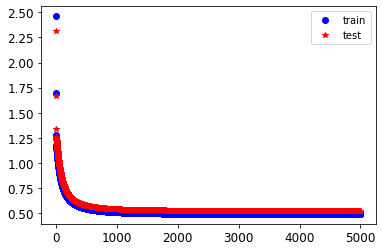

In [492]:
x_range = range(1,n_epoch+1)
start_point = 0
end_point = n_epoch
plt.plot(x_range[start_point:end_point],cost_train[start_point:end_point],'bo',label='train')
plt.plot(x_range[start_point:end_point],cost_test[start_point:end_point],'r*',label='test')
plt.legend()
plt.show()


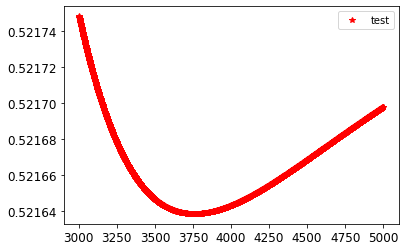

In [501]:
x_range = range(1,n_epoch+1)
start_point = 3000
end_point = 5000
#plt.plot(x_range[start_point:end_point],cost_train[start_point:end_point],'bo',label='train')
plt.plot(x_range[start_point:end_point],cost_test[start_point:end_point],'r*',label='test')
plt.legend()
plt.show()


In [494]:
proba_test = im_softmax(best_theta,X_test)
proba_test.shape

(3, 45)

In [495]:
proba_test[:,:3]

array([[8.29566178e-04, 9.13978405e-04, 1.34578659e-01],
       [1.21782786e-01, 1.21662358e-01, 6.03906299e-01],
       [8.77387648e-01, 8.77423663e-01, 2.61515041e-01]])

In [496]:
predict_test=np.argmax(proba_test,axis=0)

In [497]:
predict_test

array([2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2,
       1, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0])

In [498]:
print((predict_test == Y_test))

[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True False  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [499]:
np.mean((predict_test == Y_test))

0.8888888888888888